In [16]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [18]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=50

In [19]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "PlantVillage", 
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6652 files belonging to 6 classes.


In [20]:
class_names = dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_healthy']

In [21]:
len(dataset)

208

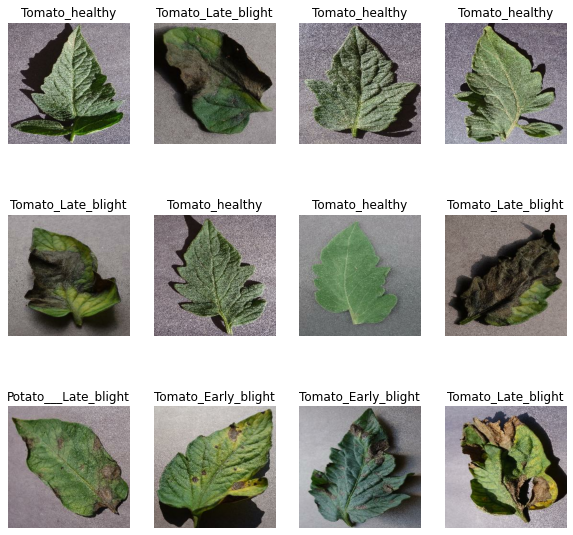

In [22]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [23]:
len(dataset)

208

In [24]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (<ipython-input-24-6e008f625a53>, line 1)

In [25]:
train_size = 0.8
len(dataset)*train_size

166.4

In [26]:
train_ds = dataset.take(166)
len(train_ds)

166

In [27]:
test_ds = dataset.skip(166)
len(test_ds)

42

In [28]:
val_size=0.1
len(dataset)*val_size

20.8

In [29]:
val_ds=test_ds.take(20)
len(val_ds)

20

In [30]:
test_ds = test_ds.skip(20)
len(test_ds)

22

In [31]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [32]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [33]:
len(train_ds)

166

In [34]:
len(val_ds)

20

In [35]:
len(test_ds)

22

In [36]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [38]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [39]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [41]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
166/166 [==============================] - 316s 2s/step - loss: 1.5584 - accuracy: 0.3208 - val_loss: 1.4158 - val_accuracy: 0.3859
Epoch 2/50
166/166 [==============================] - 301s 2s/step - loss: 1.2833 - accuracy: 0.4655 - val_loss: 1.5092 - val_accuracy: 0.5109
Epoch 3/50
166/166 [==============================] - 283s 2s/step - loss: 0.9232 - accuracy: 0.6479 - val_loss: 0.8467 - val_accuracy: 0.6797
Epoch 4/50
166/166 [==============================] - 276s 2s/step - loss: 0.7694 - accuracy: 0.7052 - val_loss: 1.3669 - val_accuracy: 0.5828
Epoch 5/50
166/166 [==============================] - 276s 2s/step - loss: 0.6720 - accuracy: 0.7315 - val_loss: 0.8130 - val_accuracy: 0.7172
Epoch 6/50
166/166 [==============================] - 275s 2s/step - loss: 0.5990 - accuracy: 0.7645 - val_loss: 0.8649 - val_accuracy: 0.6906
Epoch 7/50
166/166 [==============================] - 346s 2s/step - loss: 0.5157 - accuracy: 0.7926 - val_loss: 1.2536 - val_accuracy: 0.6562

In [45]:
scores = model.evaluate(test_ds)

22/22 [==============================] - 6s 274ms/step - loss: 0.2134 - accuracy: 0.9276


In [46]:
scores

[0.21335896849632263, 0.9275568127632141]

In [47]:
history

In [48]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 166}

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
history.history['accuracy']

[0.32083648443222046,
 0.46552374958992004,
 0.6478899717330933,
 0.7051620483398438,
 0.7315372824668884,
 0.7645063996315002,
 0.7925772666931152,
 0.8172569870948792,
 0.8311982154846191,
 0.836284875869751,
 0.8479653596878052,
 0.8726450800895691,
 0.8690655827522278,
 0.8728334307670593,
 0.8841371536254883,
 0.8850791454315186,
 0.9007158875465393,
 0.8961943984031677,
 0.9014694690704346,
 0.9146571159362793,
 0.9144687056541443,
 0.9237000942230225,
 0.9272795915603638,
 0.9397136569023132,
 0.925018846988678,
 0.9455538988113403,
 0.9406555891036987,
 0.9461190700531006,
 0.9410324096679688,
 0.9534664750099182,
 0.9453654885292053,
 0.9519593119621277,
 0.9534664750099182,
 0.9598718881607056,
 0.9551620483398438,
 0.9660889506340027,
 0.9643933773040771,
 0.9653353691101074,
 0.9655237197875977,
 0.9598718881607056,
 0.9668424725532532,
 0.9640165567398071,
 0.9651469588279724,
 0.9675960540771484,
 0.9743782877922058,
 0.9706103801727295,
 0.97211754322052,
 0.965712130069

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

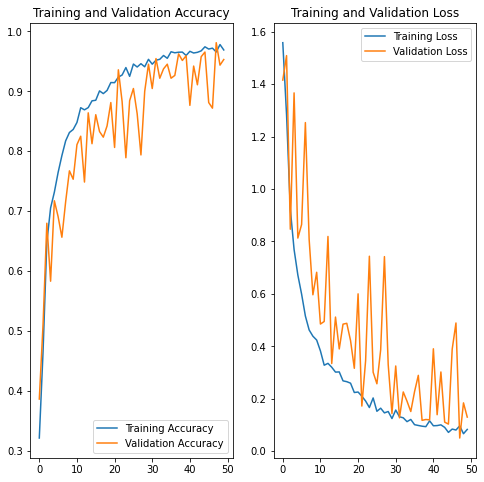

In [54]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()

first iamge to predict
actual label: Tomato_Early_blight
predicted label: Tomato_Early_blight


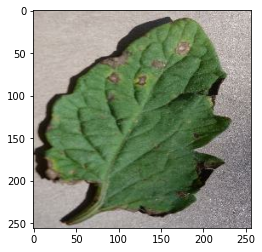

In [107]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first iamge to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [124]:
def predict(models, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = models.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.argmax(predictions[0])), 2)
    return predicted_class, confidence

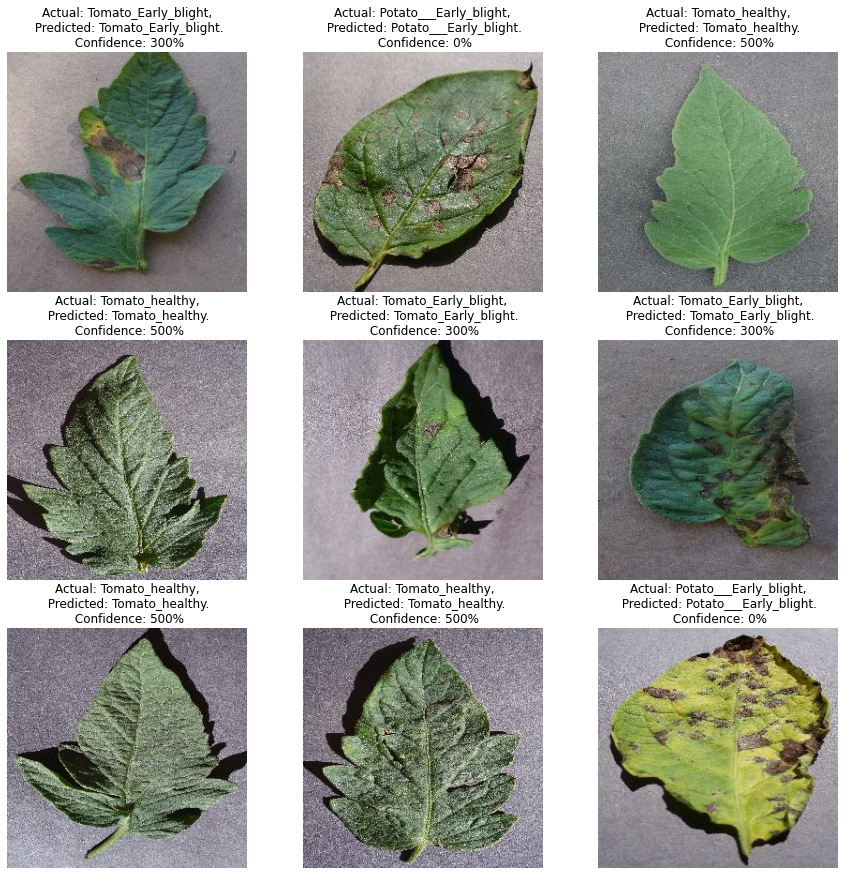

In [125]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy)
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [127]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets
